In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta

import utils

In [2]:
git_root_path = utils.get_git_root(os.getcwd())
data_path = os.path.join(git_root_path, utils.DATA_DIR_NAME)

training_csv_path = os.path.join(data_path, utils.TRAINING_FILENAME + "." + utils.INPUT_DATA_FORMAT)
submit_csv_path = os.path.join(data_path, utils.SUBMIT_FILENAME + "." + utils.INPUT_DATA_FORMAT)
submission_format_csv_path = os.path.join(data_path, utils.SUBMISSION_FORMAT_FILENAME + "." + utils.INPUT_DATA_FORMAT)
metadata_csv_path = os.path.join(data_path, utils.METADATA_FILENAME + "." + utils.INPUT_DATA_FORMAT)


In [3]:
training_df = pd.read_csv(training_csv_path, sep = ";")
submission_df = pd.read_csv(submit_csv_path, sep=";")
metadata_df = pd.read_csv(metadata_csv_path, sep=";", index_col = 0).sort_index()
submission_format_df = pd.read_csv(submission_format_csv_path, sep=";", index_col = 0).sort_index()

In [4]:
training_df["timestamp"] = pd.to_datetime(training_df["timestamp"])
site_id = 2
site_id_training_df = training_df[training_df["site_id"] == site_id]
site_id_training_df = site_id_training_df.sort_values("timestamp")
site_id_training_df = site_id_training_df.set_index("timestamp")

In [5]:
site_id_training_df.tail()

,site_id,period_id,actual_consumption,actual_pv,load_00,load_01,load_02,load_03,load_04,load_05,...,price_sell_86,price_sell_87,price_sell_88,price_sell_89,price_sell_90,price_sell_91,price_sell_92,price_sell_93,price_sell_94,price_sell_95
timestamp,,,,,,,,,,,,,,,,,,,,,
2016-03-10 15:30:00,2,6,144456.552815,111767.590935,145076.379852,148221.282737,149761.819683,150875.900040,151617.171425,146999.066464,...,0.031,0.031,0.031,0.031,0.031,0.031,0.031,0.031,0.031,0.031
2016-03-10 15:45:00,2,6,145594.005987,108382.754947,147109.167710,147310.309788,147323.614972,147160.219623,141798.618695,144404.387768,...,0.031,0.031,0.031,0.031,0.031,0.031,0.031,0.031,0.031,0.031
2016-03-10 16:00:00,2,6,142181.646472,95688.522875,143869.014624,145103.767496,145944.213002,141407.613811,144691.406559,145460.111384,...,0.031,0.031,0.031,0.031,0.031,0.031,0.031,0.031,0.031,0.031
2016-03-10 16:15:00,2,6,150143.818674,84082.668780,151251.971432,151988.371249,147366.262613,150579.779839,151290.729067,150744.580829,...,0.031,0.031,0.031,0.031,0.031,0.031,0.031,0.031,0.031,0.031
2016-03-10 16:30:00,2,6,153556.178189,71188.007633,151952.877720,145407.897755,147041.112508,146453.297817,144839.766753,146851.239532,...,0.031,0.031,0.031,0.031,0.031,0.031,0.031,0.031,0.031,0.031


In [ ]:
site_id_training_df.period_id.unique()

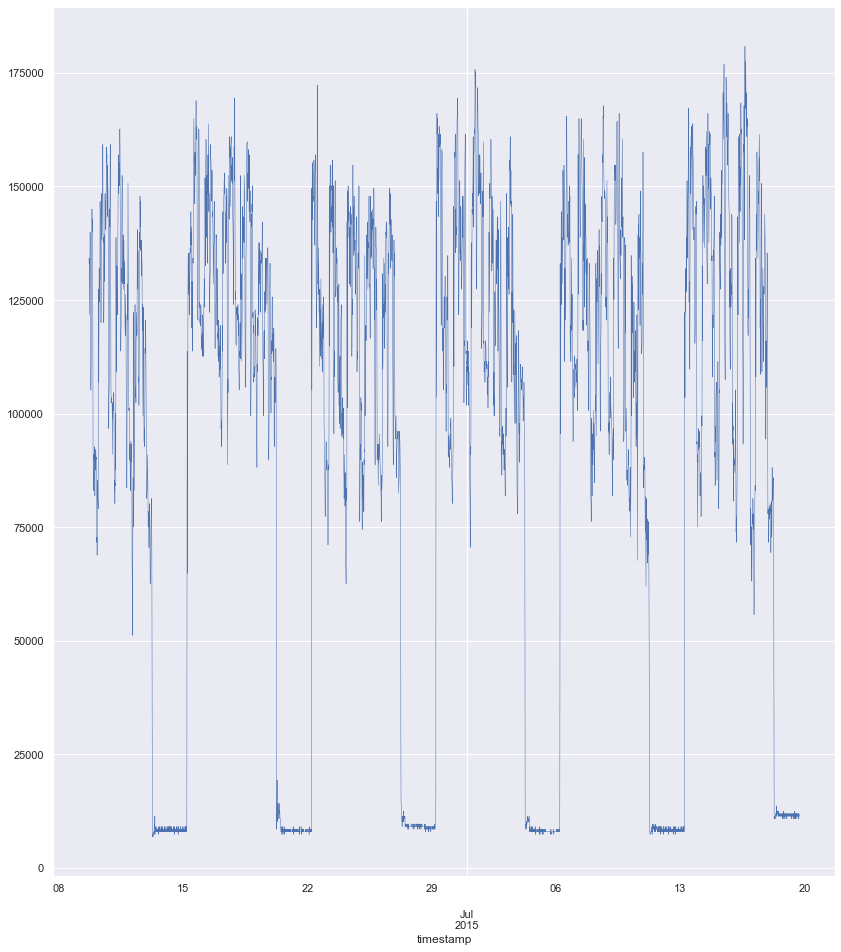

In [20]:
#https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/
sns.set(rc={'figure.figsize':(14, 16)})
period_id = 3
site_id_by_period = site_id_training_df[site_id_training_df["period_id"] == period_id]
site_id_by_period['actual_consumption'].plot(linewidth=0.5);

In [8]:
for i in range(1, 7):
    print(i)

1
2
3
4
5
6


In [ ]:
#min(site_id_by_period.index) + timedelta(days=7)
(max(site_id_by_period.index) - min(site_id_by_period.index)).days / 7

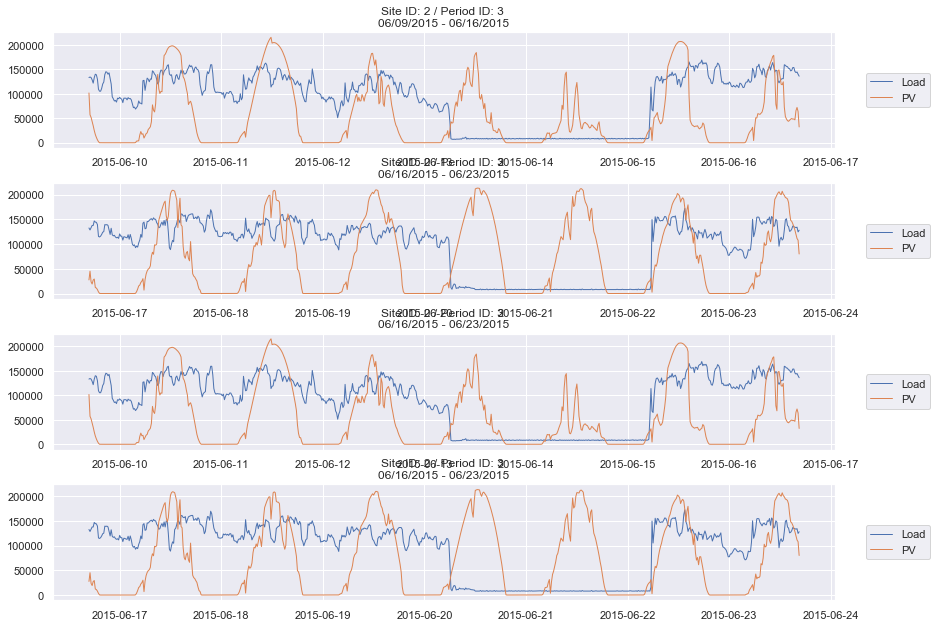

In [22]:
start_dt_str = min(site_id_by_period.index).strftime('%m/%d/%Y')
end_dt_str = (min(site_id_by_period.index) + timedelta(days=7)).strftime('%m/%d/%Y')
weekly_site_id_by_period = site_id_by_period[(site_id_by_period.index >= min(site_id_by_period.index)) \
                                             & (site_id_by_period.index < min(site_id_by_period.index) + timedelta(days=7))]

fig = plt.figure()
weekly_plot = fig.add_subplot(6, 1, 1)
weekly_plot = plt.plot('actual_consumption', data=weekly_site_id_by_period, linewidth=1, label="Load")
weekly_plot = plt.plot('actual_pv', data=weekly_site_id_by_period, linewidth=1, label="PV")
# plt.plot( 'x', 'y2', data=df, marker='', color='olive', linewidth=2)
# plt.plot( 'x', 'y3', data=df, marker='', color='olive', linewidth=2, linestyle='dashed', label="toto")
weekly_plot = plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
weekly_plot = plt.title("Site ID: {site_id} / Period ID: {period_id} \n{start_dt_str} - {end_dt_str}".format(**locals()))

weekly_site_id_by_period_2 = site_id_by_period[(site_id_by_period.index >= min(site_id_by_period.index) + timedelta(days=7)) \
                                             & (site_id_by_period.index < min(site_id_by_period.index) + timedelta(days=14))]

fig.subplots_adjust(hspace = 0.3)

start_dt_str = (min(site_id_by_period.index) + timedelta(days=7)).strftime('%m/%d/%Y')
end_dt_str = (min(site_id_by_period.index) + timedelta(days=14)).strftime('%m/%d/%Y')

del(weekly_plot)
weekly_plot = fig.add_subplot(6, 1, 2)
weekly_plot = plt.plot('actual_consumption', data=weekly_site_id_by_period_2, linewidth=1, label="Load")
weekly_plot = plt.plot('actual_pv', data=weekly_site_id_by_period_2, linewidth=1, label="PV")
# plt.plot( 'x', 'y2', data=df, marker='', color='olive', linewidth=2)
# plt.plot( 'x', 'y3', data=df, marker='', color='olive', linewidth=2, linestyle='dashed', label="toto")
weekly_plot = plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
weekly_plot = plt.title("Site ID: {site_id} / Period ID: {period_id} \n{start_dt_str} - {end_dt_str}".format(**locals()))

weekly_plot = fig.add_subplot(6, 1, 3)
weekly_plot = plt.plot('actual_consumption', data=weekly_site_id_by_period, linewidth=1, label="Load")
weekly_plot = plt.plot('actual_pv', data=weekly_site_id_by_period, linewidth=1, label="PV")
# plt.plot( 'x', 'y2', data=df, marker='', color='olive', linewidth=2)
# plt.plot( 'x', 'y3', data=df, marker='', color='olive', linewidth=2, linestyle='dashed', label="toto")
weekly_plot = plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
weekly_plot = plt.title("Site ID: {site_id} / Period ID: {period_id} \n{start_dt_str} - {end_dt_str}".format(**locals()))

weekly_site_id_by_period_2 = site_id_by_period[(site_id_by_period.index >= min(site_id_by_period.index) + timedelta(days=7)) \
                                             & (site_id_by_period.index < min(site_id_by_period.index) + timedelta(days=14))]

#fig.subplots_adjust(top = 2.0)

start_dt_str = (min(site_id_by_period.index) + timedelta(days=7)).strftime('%m/%d/%Y')
end_dt_str = (min(site_id_by_period.index) + timedelta(days=14)).strftime('%m/%d/%Y')

weekly_plot_2 = fig.add_subplot(6, 1, 4)
weekly_plot_2 = plt.plot('actual_consumption', data=weekly_site_id_by_period_2, linewidth=1, label="Load")
weekly_plot_2 = plt.plot('actual_pv', data=weekly_site_id_by_period_2, linewidth=1, label="PV")
# plt.plot( 'x', 'y2', data=df, marker='', color='olive', linewidth=2)
# plt.plot( 'x', 'y3', data=df, marker='', color='olive', linewidth=2, linestyle='dashed', label="toto")
weekly_plot_2 = plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
weekly_plot_2 = plt.title("Site ID: {site_id} / Period ID: {period_id} \n{start_dt_str} - {end_dt_str}".format(**locals()))
fig.savefig("./test.png")

# weekly_site_id_by_period['actual_consumption'].plot(linewidth=1);

In [ ]:
cols_plot = ['actual_consumption', 'actual_pv']
axes = site_id_by_period[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(14, 9), subplots=True)
# for ax in axes:
#     ax.set_ylabel('Daily Totals')

In [ ]:
metadata_df.head()

In [ ]:
submission_format_df.sort_index()

In [ ]:
#training_df = training_df.set_index(["timestamp", "period_id", "site_id"])
per_1_training_df = training_df.iloc[training_df.index.get_level_values('period_id') == 1]
per_1_training_df = per_1_training_df.sort_index(level="site_id")
per_1_training_df_subset = per_1_training_df[["actual_consumption", "actual_pv", "price_buy_00", "price_sell_00"]]
#grid_energy_without_battery =  #* (price_without_battery / 1000.)
per_1_training_df_subset["grid_energy_without_battery"] = (per_1_training_df_subset["actual_consumption"] - per_1_training_df_subset["actual_pv"]).astype(float)

def get_money_spent_without_batt(row):
    
    print(row)
    price =  float(row["price_buy_00"]) \
        if float(row["grid_energy_without_battery"] > 0) \
        else float(row["price_sell_00"])
    
    return ((price / 1000.) * float(row["grid_energy_without_battery"]))
        

per_1_training_df_subset["money_spent_without_battery"] = per_1_training_df_subset.apply(lambda x: get_money_spent_without_batt(x))
per_1_training_df_subset.head()

In [ ]:
per_1_training_df_subset.to_csv(os.path.join(data_path, "exploration", "period_1_training.csv"))


In [ ]:
submission_df[["timestamp", "period_id", "site_id", "actual_consumption", "load_00", "actual_pv", "pv_00", "price_buy_01", "price_sell_01"]].head()

In [ ]:
sorted(training_df["site_id"].unique())

In [ ]:
metadata_df = pd.read_csv(metadata_csv_path, sep = ";")

In [ ]:
metadata_df

In [ ]:
site_ids = sorted(submission_df["site_id"].unique())

In [ ]:
import math
math.sqrt(.95)